In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income
0,Michel,27,70000
1,Mohan,29,90000
2,Lasmail,29,61000
3,Kony,28,60000
4,Gautam,42,150000
5,David,39,155000
6,Andera,41,160000
7,Brad,38,162000
8,Angelina,36,156000
9,Donald,35,130000


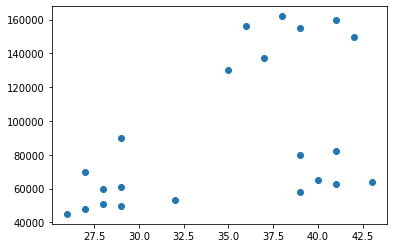

In [ ]:
plt.scatter(df['Age'] , df['Income'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred = km.fit_predict(df[['Age' , 'Income']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income,Cluster
0,Michel,27,70000,0
1,Mohan,29,90000,0
2,Lasmail,29,61000,2
3,Kony,28,60000,2
4,Gautam,42,150000,1


In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

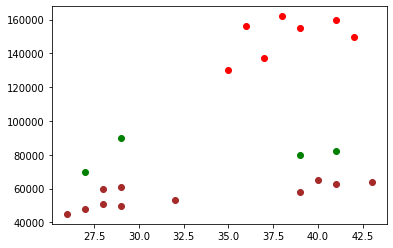

In [ ]:
plt.scatter(df1.Age , df1.Income , color = 'green')
plt.scatter(df2.Age , df2.Income , color = 'red')
plt.scatter(df3.Age , df3.Income , color = 'brown')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
df

,Name,Age,Income,Cluster
0,Michel,0.058824,0.213675,0
1,Mohan,0.176471,0.384615,0
2,Lasmail,0.176471,0.136752,2
3,Kony,0.117647,0.128205,2
4,Gautam,0.941176,0.897436,1
5,David,0.764706,0.940171,1
6,Andera,0.882353,0.982906,1
7,Brad,0.705882,1.000000,1
8,Angelina,0.588235,0.948718,1
9,Donald,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age' ,'Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income,Cluster
0,Michel,0.058824,0.213675,1
1,Mohan,0.176471,0.384615,1
2,Lasmail,0.176471,0.136752,1
3,Kony,0.117647,0.128205,1
4,Gautam,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

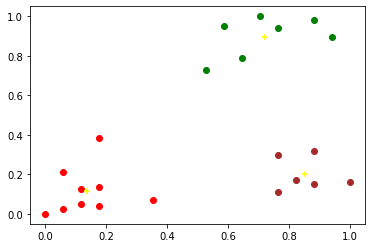

In [ ]:
plt.scatter(df1.Age , df1.Income , color = 'green')
plt.scatter(df2.Age , df2.Income , color = 'red')
plt.scatter(df3.Age , df3.Income , color = 'brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='+',label='centroid')
plt.show()

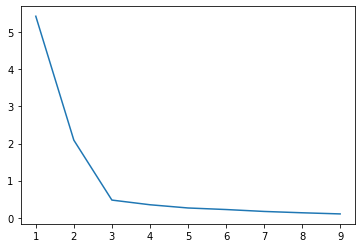

In [ ]:
k_rng = range(1,10)
see = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  see.append(km.inertia_)

plt.plot(k_rng,see)
plt.show()